In [ ]:
%pip install matplotlib

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

crude = pd.read_csv('CLF_data_1.csv')
delta = pd.read_csv('DAL_data_1.csv')


In [ ]:
# Plot the closing prices for `delta` and `crude`

plt.plot(delta['Close'], label='Delta')

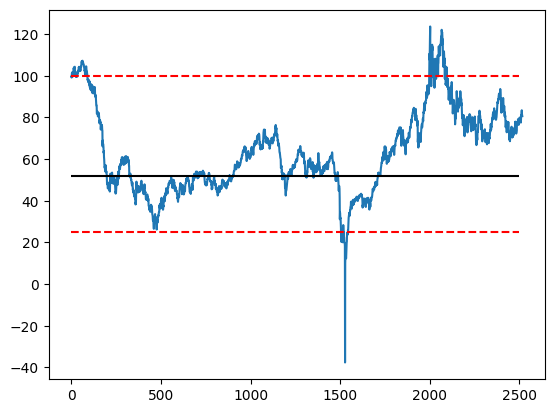

In [62]:
plt.plot(crude['Close'], label='Crude Oil')
plt.hlines(25, 0, 2500, colors='r', linestyles='dashed', label='Zero')
plt.hlines(100, 0, 2500, colors='r', linestyles='dashed', label='Zero')
plt.hlines(52, 0, 2500, colors='black', linestyles='solid', label='Zero')


In [ ]:
def strategy(crude, delta, crude_range, prop_crude_range, prop_mm_d):
    prop_mm = 1
    prop_crude = 0
    prop_delta = 0

    if crude < crude_range[0]:
        crude = crude_range[0]
    elif crude > crude_range[1]:
        crude = crude_range[1]
    crude_quantile = (crude - crude_range[0]) / (crude_range[1] - crude_range[0])

    prop_crude = prop_crude_range[1] - (prop_crude_range[1] - prop_crude_range[0]) * crude_quantile
    prop_delta = (1 - prop_crude) * prop_mm_d
    prop_mm = 1 - prop_crude - prop_delta

    return (prop_crude, prop_delta, prop_mm)

In [ ]:
def backtest(crude_prices, delta_prices, strategy_params, rebalance_interval=30, initial_investment=10000):
    current_value = initial_investment
    portfolio = {"crude": 0, "delta": 0, "mm": current_value}
    indices = crude_prices.index.union(delta_prices.index).sort_values()

    for day in indices:
        if (day - 1) % rebalance_interval == 0:
            crude_price = crude_prices[day]
            delta_price = delta_prices[day]

            prop_crude, prop_delta, prop_mm = strategy(crude_price, delta_price, strategy_params[0], strategy_params[1], strategy_params[2])
            portfolio["crude"] = prop_crude * current_value
            portfolio["delta"] = prop_delta * current_value
            portfolio["mm"] = current_value - portfolio["crude"] - portfolio["delta"]

            if day == 1:
                continue
            portfolio["crude"] *= crude_prices[day] / crude_prices[day - 30]
            portfolio["delta"] *= delta_prices[day] / delta_prices[day - 30]
        
        current_value = portfolio["crude"] + portfolio["delta"] + portfolio["mm"]
    
    return current_value

backtest(crude['Close'], delta['Close'], strategy_params=((30, 90), (0.05, 0.3), .3))

for i in range(5, 45):
    for j in range(70, 100):
        for k in range(1, 25):
            for l in range(26, 50):
                for m in range(1, 5):
                    print(backtest(crude['Close'], delta['Close'], strategy_params=((i, j), (k / 100, l / 100), m / 10)))